In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from models.migdal import Migdal
from detectors.sabre import SABRE
from veldists import VelDist
from constants import *

import multihist as mh

In [2]:
Det = SABRE()
Model = Migdal()
Dist = VelDist("avSHM", 0.3)

In [3]:
mass = 1. * GeV
ref_xsec = 1e-36

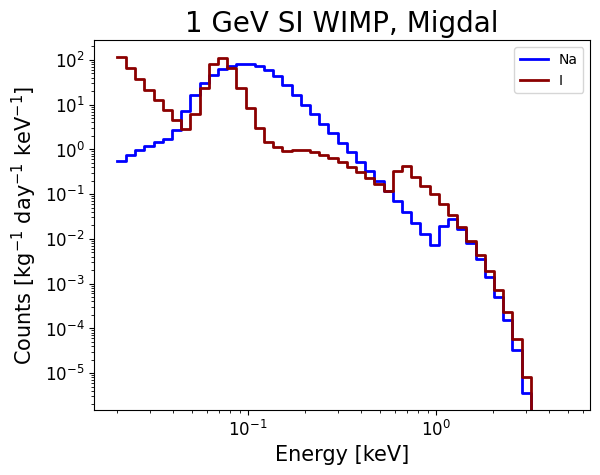

In [4]:
energy_edges = np.geomspace(0.02, 5)

rate_edges = np.array([Model.dRdER(Det.Nuclei()[0], e * keV, mX=mass, sig=ref_xsec, VelDist=Dist,
                                   SI=True) for e in energy_edges])
rate_centers = 0.5 * (rate_edges[1:] + rate_edges[:-1])
hist = mh.Histdd.from_histogram(histogram=rate_centers, bin_edges=[energy_edges])
hist.plot(color='blue', linewidth=2)

rate_edges = np.array([Model.dRdER(Det.Nuclei()[1], e * keV, mX=mass, sig=ref_xsec, VelDist=Dist,
                                   SI=True) for e in energy_edges])
rate_centers = 0.5 * (rate_edges[1:] + rate_edges[:-1])
hist = mh.Histdd.from_histogram(histogram=rate_centers, bin_edges=[energy_edges])
hist.plot(color='darkred', linewidth=2)

plt.legend(['Na', 'I'])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Counts [kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
plt.title(r'1 GeV SI WIMP, Migdal', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)